<a href="https://colab.research.google.com/github/JuanPabloJP/Big-Data-2/blob/main/Link%20Analysis/Project/pageRank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size = 13>
<font color = 'darkblue'>
Datos Masivos II: Análisis de vínculos 


*   **Barriga Rosales Alan**
*   **Avalos Gonzalez Joel Sebastian**
*   **Hernández Lozano Juan Pablo**


<font size = 6>
<font color = 'darkred'>
Slashdot social network

Slashdot es un sitio web de noticias relacionadas con la tecnología conocido por su comunidad de usuarios específica. El sitio web presenta noticias actualizadas principalmente orientadas a la tecnología, enviadas por los usuarios y evaluadas por el editor. En 2002, Slashdot introdujo la función Slashdot Zoo que permite a los usuarios etiquetarse entre sí como amigos o enemigos. La red contiene vínculos amigos / enemigos entre los usuarios de Slashdot. La red con la que se trabaja en este proyecto se obtuvo en febrero de 2009.


El objetivo de este mini-proyecto es calcular la relevancia de los nodos a partir de la relevancia de los enlaces entrantes usando el 
<font size = 4>
<font color = '#bd0f0f'>
algoritmo de Page Rank.


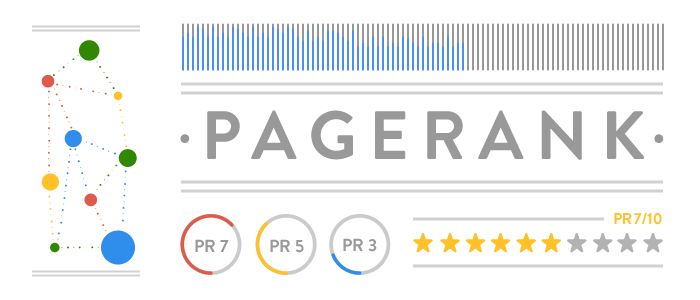


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import networkx as nx
sns.set(style="darkgrid")

In [ ]:
data = pd.read_csv('Slashdot0902.txt', skiprows=5, sep = '\t', names= ['source', 'target'])
data.head(3)

source  target
0       0       1
1       0       2
2       0       3

In [ ]:
G = nx.from_pandas_edgelist(data, source = 'source', target = 'target', create_using=nx.DiGraph())

In [ ]:
data.shape

(948463, 2)

## Explorando los datos:

In [ ]:
data_hub = pd.DataFrame(data.source.value_counts())
data_hub.reset_index(inplace=True)
data_hub.rename(columns = {'index':'node', 'source':'Hub value'}, inplace = True)

In [ ]:
import plotly.express as px

data_hub = data_hub[:50]
fig = px.bar(data_hub, x='node', y='Hub value',color='Hub value', title = 'Hubs')
fig.update_xaxes(type='category')

fig.show()

In [ ]:
data_aut = pd.DataFrame(data.target.value_counts())
data_aut.reset_index(inplace=True)
data_aut.rename(columns = {'index':'node', 'target':'Authority value'}, inplace = True)

data_aut = data_aut[:50]
fig = px.bar(data_aut, x='node', y='Authority value',color='Authority value', title = 'Authority', 
             color_continuous_scale='Cividis_r')
fig.update_xaxes(type='category')

fig.show()

El coeficiente de clustering es una medida de cuánto se acumulan enlaces en grupos de nodos, o lo que es lo mismo, cuántos enlaces hay entre los nodos vecinos de un nodo. A partir de ello se pueden identificar zonas de "alta densidad" de enlaces y nodos aislados (relativamente).

In [ ]:
clustering = nx.clustering(G)
clus = np.array([ clustering[i] for i in G ])

Para los gráficos dirigidos, la agrupación se define de manera similar como la fracción de todos los posibles triángulos dirigidos o el promedio geométrico de los pesos de los bordes del subgráfico para los gráficos dirigidos ponderados y no ponderados, respectivamente

$$c_u = \frac {2} {deg ^ {tot} (u) (deg ^ {tot} (u) -1) - 2deg ^ {\leftrightarrow} (u)}
      T (u), $$


dónde $T (u)$ es el número de triángulos dirigidos a través del nodo $u$, $deg ^ {tot} (u)$ es la suma de en grado y fuera de grado de $u$ y $deg ^ {\leftrightarrow} (u)$  es el grado recíproco de $u$.



```
from networkx.algorithms.community import greedy_modularity_communities
comunidades = greedy_modularity_communities(G)

diccionario_com = {}

for i, comunidad in enumerate(comunidades): #visita cada comunidad
  for nodo in comunidad: #visita cada nodo de la comunidad
    diccionario_com[nodo] = i 
    
coms = np.array([diccionario_com[i] for i in G ])
nodos = np.array([i for i in G ])
```



<font size = 5>
<font color = 'green'>
Medidas de centralidad

Una forma de analizar las propiedades de los nodos es visualizar las centralidades no ya como elementos de la gráfica de la red, sino una gráfica x-y donde la abcisa sea el nodo y la ordenada el valor de la centralidad. Esto permite visualizar varias (tantas como quieras) centralidades distintas y ver si están correlacionadas o si hay algún nodo que sea importante para más de una centralidad.



```
deg = nx.degree_centrality(G)
d = np.array([deg[i] for i in data_aut['node'][:500].values])

clos = nx.closeness_centrality(G)
c = np.array([clos[i] for i in data_aut['node'][:500].values])

bet = nx.betweenness_centrality(G)
b = np.array([bet[i] for i in data_aut['node'][:500].values])

eig = nx.eigenvector_centrality(G)
e = np.array([eig[i] for i in data_aut['node'][:500].values])

```



In [ ]:
deg = nx.degree_centrality(G)
d = np.array([deg[i] for i in data_aut['node'][:500].values])

eig = nx.eigenvector_centrality(G)
e = np.array([eig[i] for i in data_aut['node'][:500].values])

In [ ]:
in_c = nx.in_degree_centrality(G)
in_ = np.array([in_c[i] for i in data_aut['node'][:500].values])

out_c = nx.out_degree_centrality(G)
out_ = np.array([out_c[i] for i in data_aut['node'][:500].values])

- La centralidad de grado se basa en el supuesto de que los nodos importantes tienen muchas conexiones.

- La centralidad de vectores propios asigna puntuaciones relativas a todos los nodos de la red según el concepto de que las conexiones a los nodos de puntuación alta contribuyen más a la puntuación del nodo en cuestión que las conexiones iguales a los nodos de puntuación baja. Una puntuación alta de vector propio significa que un nodo está conectado a muchos nodos que, a su vez, tienen puntuaciones altas.

In [ ]:
nodes = data_aut['node'][:500].values

import plotly.graph_objects as go


# Create traces
fig = go.Figure()

fig.add_trace(go.Scatter(x=nodes, y=d,
                    mode='markers+lines',
                    name='Degree'))
fig.add_trace(go.Scatter(x=nodes, y=e,
                    mode='markers+lines',
                    name='Eigenvector'))
fig.add_trace(go.Scatter(x=nodes, y=in_,
                    mode='markers+lines', name='In degree'))
fig.add_trace(go.Scatter(x=nodes, y=out_,
                    mode='markers+lines', name='Out degree'))

fig.update_layout(
    title="Centrality Measures",
    xaxis_title="Nodes",
    yaxis_title="Centrality"
)
fig.update_xaxes(type='category')

fig.show()

In [ ]:
d = np.array([deg[i] for i in G])
e = np.array([eig[i] for i in G])
in_ = np.array([in_c[i] for i in G])
out_ = np.array([out_c[i] for i in G])
nodes = np.array([i for i in G])

mydict = {'Node':nodes,'Clustering':clus,'Degree':d,'Eigenvector':e,'inDegree':in_,'outDegree':out_ }
mydf = pd.DataFrame(mydict)

In [ ]:
fig = px.scatter(mydf, x="Clustering", y="Eigenvector", color="Clustering",
                 size='Degree', hover_data=['Node'], range_color=(0,0.3),
                 color_continuous_scale='Viridis',
                 title= 'Análisis de Clustering por centralidad de eigenvector')

fig.update_layout(coloraxis_showscale=False)

fig.show()

In [ ]:
G2 = nx.from_pandas_edgelist(data, source = 'source', target = 'target')
N = nx.number_of_nodes(G)

print("El grado promedio de la red es %.3f" %(2*nx.number_of_edges(G)/N))

print("El clustering promedio de la red es %.3f" %nx.average_clustering(G))

componentes = list(nx.connected_components(G2))
max_comp = max(componentes, key = len ) #nodos de la máxima componente
print("La máxima componente contiene %i de los %i nodos" %(len(max_comp), len(G2)))

El grado promedio de la red es 23.086
El clustering promedio de la red es 0.057
La máxima componente contiene 82168 de los 82168 nodos


---

## Implementación del algoritmo **HITS**





In [ ]:
unique_source = set(data.source.unique())
unique_target = set(data.target.unique())
unique_nodes = list(unique_source | unique_target)
hits_df = pd.DataFrame({'Nodes':unique_nodes})
hits_df['Hub'] = 1
hits_df['Auth'] = 1

In [ ]:
hits_df.head()

Nodes  Hub  Auth
0      0    1     1
1      1    1     1
2      2    1     1
3      3    1     1
4      4    1     1

In [ ]:
hub_aux = data.groupby('source').agg({'target':list})
aut_aux = data.groupby('target').agg({'source':list})

In [ ]:
hub_aux.head(2)

target
source                                                   
0       [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
1       [0, 1, 4, 9, 60, 92, 94, 95, 128, 148, 150, 15...

In [ ]:
hubs = hub_aux[hub_aux.index == 3].target.values[0]
int([sum(int(hits_df[hits_df['Nodes'] == auth].Auth.values) for auth in hubs)][0])

55

In [ ]:
new_hubs = []
for i in hits_df.Nodes.values:
    if i in hub_aux.index.values:
        hubs = hub_aux[hub_aux.index == i].target.values[0]
        auths = int([sum(int(hits_df[hits_df['Nodes'] == auth].Auth.values) for auth in hubs)][0])
        new_hubs.append(auths)
    else: 
        new_hubs.append(1)

In [ ]:
def update_hub(hits_df):
    new_hubs = []
    for i in hits_df.Nodes.values:
        if i in hub_aux.index.values:
            hubs = hub_aux[hub_aux.index == i].target.values[0]
            auths = int([sum(int(hits_df[hits_df['Nodes'] == auth].Auth.values) for auth in hubs)][0])
            new_hubs.append(auths)
        else: 
            new_hubs.append(1)

    return new_hubs 

def update_hub(hits_df):
    new_auths = []
    for i in hits_df.Nodes.values:
        if i in aut_aux.index.values:
            auths = aut_aux[aut_aux.index == i].source.values[0]
            hubs = int([sum(int(hits_df[hits_df['Nodes'] == hub].Hub.values) for hub in auths)][0])
            new_auths.append(hubs)
        else: 
            new_auths.append(1)

    return new_auths 

In [ ]:
def hits_method(iter=10):
    df = hits_df.copy()
    for i in range(iter):
        new_hubs = update_hub(hits_df)
        new_auths = update_auth(hits_df)
        hits_df['Hub'] = new_hubs
        hits_df['Auth'] = new_auths
        df['Hub'+str(i+1)] = new_hubs
        df['Auth'+str(i+1)] = new_auths

    return df

In [ ]:
final_hits = hits_method()

---

## Implementación de **PageRank** en pyspark

In [ ]:
!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

     |████████████████████████████████| 281.3 MB 33 kB/s 
     |████████████████████████████████| 198 kB 52.2 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805912 sha256=66a41a9a14129656cfb8327ff7a95d6b03cfc49a442a974ec96a66ebe83e50c5
  Stored in directory: /root/.cache/pip/wheels/0b/de/d2/9be5d59d7331c6c2a7c1b6d1a4f463ce107332b1ecd4e80718
Successfully built pyspark
The following additional packages will be installed:
  openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 2 newly installed, 0 to remove and 37 not upgraded.
Need to get 36.5 MB of archives.
After this operation, 143 MB of additional disk space will be used.
Selecting previously unselected package openjdk-8-jre-headless:amd64.
(Rea

In [ ]:
import pyspark
from pyspark import SparkContext

sc = SparkContext(appName="PageRank_pySpark") # Initialize the spark context.

In [ ]:
links = sc.textFile('/content/Slashdot0902.txt')

In [ ]:
# create RDD in format (URL, [neighbors])
links = links.map(lambda x: x.split()).map(lambda x: (x[0], x[1])).distinct().groupByKey()

In [ ]:
# after groupBy, value is iterator; let's convert to a list
links = links.mapValues(lambda x: list(x))
links.take(3)

[('#', ['Directed', 'Nodes:', 'Slashdot', 'FromNodeId']),
 ('0',
  ['0',
   '1',
   '4',
   '8',
   '9',
   '10',
   '12',
   '14',
   '16',
   '17',
   '19',
   '20',
   '21',
   '22',
   '24',
   '26',
   '29',
   '33',
   '34',
   '40',
   '44',
   '45',
   '48',
   '50',
   '53',
   '54',
   '56',
   '57',
   '60',
   '63',
   '64',
   '66',
   '68',
   '69',
   '70',
   '73',
   '74',
   '77',
   '82',
   '83',
   '84',
   '86',
   '88',
   '91',
   '93',
   '96',
   '98',
   '100',
   '102',
   '106',
   '107',
   '108',
   '110',
   '111',
   '112',
   '113',
   '115',
   '116',
   '119',
   '121',
   '122',
   '128',
   '130',
   '132',
   '134',
   '138',
   '139',
   '140',
   '141',
   '143',
   '144',
   '145',
   '146',
   '147',
   '150',
   '153',
   '154',
   '157',
   '158',
   '160',
   '161',
   '162',
   '163',
   '164',
   '167',
   '173',
   '174',
   '175',
   '179',
   '180',
   '184',
   '185',
   '188',
   '189',
   '190',
   '192',
   '198',
   '202',
   '204

In [ ]:
# Initialize rank of each URL to 1
ranks = links.map(lambda x: (x[0], 1.0))

In [ ]:
# returns list of (url, contribution) tuples to each url 
def computeContribs(urls, rank):
    """Calculates URL contributions to the rank of other URLs."""
    num_urls = len(urls)
    contributions = []
    for url in urls:
        contributions.append( (url, rank/num_urls ) )
    return contributions

In [ ]:
# Calculates and updates URL ranks continuously using PageRank algorithm.
for iteration in range(10):
    
    # create RDD of form: (url, (neighbors, rank)
    contribs = links.join(ranks)
    contribs.collect()
    
    # create RDD of form: (url, contributed rank)
    contribs = contribs.flatMap( #neighbor urls,  rank
             lambda x: computeContribs(x[1][0], x[1][1]))

    # Re-calculates URL ranks based on neighbor contributions, by
    #     summing contributions to each url (reduceByKey)
    #     rank = .85*contributions + 0.15 (mapValues)
    ranks = contribs.reduceByKey(lambda v1,v2:v1+v2).mapValues(lambda rank: rank * 0.85 + 0.15)
    ranks.collect()

In [ ]:
# Output final
for link, rank in ranks.take(5):
    print(link, "has rank:", rank)

24 has rank: 2.4786050867221983
1531 has rank: 31.62561285367319
33 has rank: 0.44063331933270367
56 has rank: 2.578206011965436
215 has rank: 6.740187553980278


In [ ]:
#Tomamos los 50 principales nodos
ranks_50 = ranks.sortBy(lambda x : x[1],ascending = False).take(100)

In [ ]:
df_50 = pd.DataFrame(ranks_50)
df_50.columns = ["nodo","rank"]
df_50.head()

nodo        rank
0  2494  158.646572
1   398  146.612843
2   381  135.837343
3  4805  107.428156
4    37  106.633283

In [ ]:
import plotly.express as px

fig = px.bar(df_50, x='nodo', y='rank',color='rank', title = 'Page rank de los 50 principales nodos')
fig.update_xaxes(type='category')

fig.show()

In [ ]:
#Tomamos los nodos con menor Page Rank
ranks_50 = ranks.sortBy(lambda x : x[1]).take(50)

df_50 = pd.DataFrame(ranks_50)
df_50.columns = ["nodo","rank"]

fig = px.bar(df_50, x='nodo', y='rank',color='rank', title = '50 nodos con menor Page Rank')
fig.update_xaxes(type='category')

fig.show()

## Recomendaciones

In [ ]:
def recomienda_2(n):
  vecinos = list(G.neighbors(n))

  pr_nodos_vecinos = {}
  for i in vecinos:
    pk = list(df_pagerank['rank'][(df_pagerank.nodo==str(n))])
    pr_nodos_vecinos[i] = pk[0]

  sort_nodes = sorted(pr_nodos_vecinos.items(), key=lambda x: x[1])

  return sort_nodes

In [ ]:
recomienda_2(234)

[(216, 0.41829813912325986), (234, 0.41829813912325986)]

In [ ]:
recomienda_2(24)

[(0, 2.4786050867221983),
 (24, 2.4786050867221983),
 (141, 2.4786050867221983),
 (717, 2.4786050867221983),
 (1151, 2.4786050867221983),
 (1531, 2.4786050867221983),
 (1600, 2.4786050867221983),
 (1900, 2.4786050867221983),
 (2950, 2.4786050867221983),
 (3162, 2.4786050867221983),
 (3483, 2.4786050867221983),
 (3589, 2.4786050867221983),
 (3838, 2.4786050867221983),
 (3994, 2.4786050867221983),
 (4118, 2.4786050867221983),
 (4323, 2.4786050867221983),
 (4454, 2.4786050867221983),
 (4927, 2.4786050867221983),
 (4969, 2.4786050867221983),
 (5165, 2.4786050867221983),
 (5314, 2.4786050867221983),
 (5645, 2.4786050867221983),
 (6027, 2.4786050867221983),
 (6067, 2.4786050867221983),
 (6068, 2.4786050867221983),
 (6069, 2.4786050867221983),
 (6070, 2.4786050867221983),
 (6071, 2.4786050867221983),
 (6072, 2.4786050867221983),
 (6073, 2.4786050867221983),
 (6074, 2.4786050867221983),
 (6075, 2.4786050867221983),
 (6076, 2.4786050867221983),
 (6077, 2.4786050867221983),
 (6078, 2.47860508672

In [ ]:
recomienda_2(9399)

[(2196, 1.998934681619699),
 (3362, 1.998934681619699),
 (5248, 1.998934681619699),
 (5463, 1.998934681619699),
 (5896, 1.998934681619699),
 (5905, 1.998934681619699),
 (6073, 1.998934681619699),
 (6208, 1.998934681619699),
 (6216, 1.998934681619699),
 (6653, 1.998934681619699),
 (8180, 1.998934681619699),
 (8595, 1.998934681619699),
 (8621, 1.998934681619699),
 (9191, 1.998934681619699),
 (9247, 1.998934681619699),
 (9368, 1.998934681619699),
 (9399, 1.998934681619699),
 (12035, 1.998934681619699),
 (12187, 1.998934681619699),
 (12487, 1.998934681619699),
 (12981, 1.998934681619699),
 (14222, 1.998934681619699),
 (24978, 1.998934681619699),
 (56278, 1.998934681619699),
 (56279, 1.998934681619699),
 (56280, 1.998934681619699),
 (56281, 1.998934681619699)]

In [ ]:
def recomienda(n):
  vecinos = list(G.neighbors(n))

  pr_nodos_vecinos = {}
  for i in vecinos:
    pk = list(df_pagerank['rank'][(df_pagerank.nodo==str(n))])
    pr_nodos_vecinos[i] = pk[0]
    
    return pr_nodos_vecinos

In [ ]:
recomienda(234)

{216: 0.41829813912325986}

In [ ]:
recomienda(12)

{0: 0.6256955162193322}

In [ ]:
recomienda(9399)

{2196: 1.998934681619699}

---

## Implementación del algoritmo **HITS** (por si queda)

In [ ]:
def computeAuth(urls, hub):
    """Calculates hub contributions to the auth of other URLs."""
    num_urls = len(urls)
    for url in urls: yield (url, hub)

def computeHub(urls, auth):
    """Calculates auth contributions to the hub of other URLs."""
    num_urls = len(urls)
    for url in urls: yield (url, auth)

def outNeighbors(urls):
    """Parses a urls pair string into urls pair."""
    parts = re.split(r'\s+', urls)
    return parts[0], parts[1]

def inNeighbors(urls):
    """Parses a urls pair string into urls pair."""
    parts = re.split(r'\s+', urls)
    return parts[1], parts[0]

In [ ]:
lineas = sc.textFile('/content/Slashdot0902.txt')

In [ ]:
lineas.take(5)

['0\t0', '0\t1', '0\t2', '0\t3', '0\t4']

In [ ]:
# create RDD in format (URL)
out_links = lineas.map(lambda urls: outNeighbors(urls)).distinct().groupByKey()
out_links.take(5)

[('0', <pyspark.resultiterable.ResultIterable at 0x7f9775013d10>),
 ('1', <pyspark.resultiterable.ResultIterable at 0x7f978aec9ad0>),
 ('4', <pyspark.resultiterable.ResultIterable at 0x7f97749db850>),
 ('8', <pyspark.resultiterable.ResultIterable at 0x7f97749e4e50>),
 ('9', <pyspark.resultiterable.ResultIterable at 0x7f97749e9a50>)]

In [ ]:
# create RDD in format (URL)
in_links = lineas.map(lambda urls: inNeighbors(urls)).distinct().groupByKey()
in_links.collect()

[('0', <pyspark.resultiterable.ResultIterable at 0x7f97812d87d0>),
 ('1', <pyspark.resultiterable.ResultIterable at 0x7f97812d8350>),
 ('4', <pyspark.resultiterable.ResultIterable at 0x7f977fa8b7d0>),
 ('8', <pyspark.resultiterable.ResultIterable at 0x7f977fa85e90>),
 ('9', <pyspark.resultiterable.ResultIterable at 0x7f977fa97810>),
 ('10', <pyspark.resultiterable.ResultIterable at 0x7f977fa9a550>),
 ('12', <pyspark.resultiterable.ResultIterable at 0x7f977fa9ab50>),
 ('14', <pyspark.resultiterable.ResultIterable at 0x7f977fa85e50>),
 ('16', <pyspark.resultiterable.ResultIterable at 0x7f977fa9bed0>),
 ('17', <pyspark.resultiterable.ResultIterable at 0x7f977fa9e750>),
 ('19', <pyspark.resultiterable.ResultIterable at 0x7f977faa7e50>),
 ('20', <pyspark.resultiterable.ResultIterable at 0x7f977faa8690>),
 ('21', <pyspark.resultiterable.ResultIterable at 0x7f977faa8850>),
 ('22', <pyspark.resultiterable.ResultIterable at 0x7f977faaa290>),
 ('24', <pyspark.resultiterable.ResultIterable at 0x7

In [ ]:
# Initialize hub of each URL to 1
hubs = out_links.map(lambda x: (x[0], 1.0))
hubs.collect()

[('0', 1.0),
 ('1', 1.0),
 ('4', 1.0),
 ('8', 1.0),
 ('9', 1.0),
 ('10', 1.0),
 ('12', 1.0),
 ('14', 1.0),
 ('16', 1.0),
 ('17', 1.0),
 ('19', 1.0),
 ('20', 1.0),
 ('21', 1.0),
 ('22', 1.0),
 ('24', 1.0),
 ('26', 1.0),
 ('29', 1.0),
 ('33', 1.0),
 ('34', 1.0),
 ('40', 1.0),
 ('44', 1.0),
 ('45', 1.0),
 ('48', 1.0),
 ('50', 1.0),
 ('53', 1.0),
 ('54', 1.0),
 ('56', 1.0),
 ('57', 1.0),
 ('60', 1.0),
 ('63', 1.0),
 ('64', 1.0),
 ('66', 1.0),
 ('68', 1.0),
 ('69', 1.0),
 ('70', 1.0),
 ('73', 1.0),
 ('74', 1.0),
 ('77', 1.0),
 ('82', 1.0),
 ('83', 1.0),
 ('84', 1.0),
 ('86', 1.0),
 ('88', 1.0),
 ('91', 1.0),
 ('93', 1.0),
 ('96', 1.0),
 ('98', 1.0),
 ('100', 1.0),
 ('102', 1.0),
 ('106', 1.0),
 ('107', 1.0),
 ('108', 1.0),
 ('110', 1.0),
 ('111', 1.0),
 ('112', 1.0),
 ('113', 1.0),
 ('115', 1.0),
 ('116', 1.0),
 ('119', 1.0),
 ('121', 1.0),
 ('122', 1.0),
 ('128', 1.0),
 ('130', 1.0),
 ('132', 1.0),
 ('134', 1.0),
 ('138', 1.0),
 ('139', 1.0),
 ('140', 1.0),
 ('141', 1.0),
 ('143', 1.0),
 (

In [ ]:
# Initialize auths of each URL to 1
auths = in_links.map(lambda x: (x[0], 1.0))
auths.collect()

[('0', 1.0),
 ('1', 1.0),
 ('4', 1.0),
 ('8', 1.0),
 ('9', 1.0),
 ('10', 1.0),
 ('12', 1.0),
 ('14', 1.0),
 ('16', 1.0),
 ('17', 1.0),
 ('19', 1.0),
 ('20', 1.0),
 ('21', 1.0),
 ('22', 1.0),
 ('24', 1.0),
 ('26', 1.0),
 ('29', 1.0),
 ('33', 1.0),
 ('34', 1.0),
 ('40', 1.0),
 ('44', 1.0),
 ('45', 1.0),
 ('48', 1.0),
 ('50', 1.0),
 ('53', 1.0),
 ('54', 1.0),
 ('56', 1.0),
 ('57', 1.0),
 ('60', 1.0),
 ('63', 1.0),
 ('64', 1.0),
 ('66', 1.0),
 ('68', 1.0),
 ('69', 1.0),
 ('70', 1.0),
 ('73', 1.0),
 ('74', 1.0),
 ('77', 1.0),
 ('82', 1.0),
 ('83', 1.0),
 ('84', 1.0),
 ('86', 1.0),
 ('88', 1.0),
 ('91', 1.0),
 ('93', 1.0),
 ('96', 1.0),
 ('98', 1.0),
 ('100', 1.0),
 ('102', 1.0),
 ('106', 1.0),
 ('107', 1.0),
 ('108', 1.0),
 ('110', 1.0),
 ('111', 1.0),
 ('112', 1.0),
 ('113', 1.0),
 ('115', 1.0),
 ('116', 1.0),
 ('119', 1.0),
 ('121', 1.0),
 ('122', 1.0),
 ('128', 1.0),
 ('130', 1.0),
 ('132', 1.0),
 ('134', 1.0),
 ('138', 1.0),
 ('139', 1.0),
 ('140', 1.0),
 ('141', 1.0),
 ('143', 1.0),
 (

In [ ]:
# Calculates and updates hub & auth ranks continuously using HITS algorithm.
for iteration in range(10):
  # Calculates URL contributions to the rank of other URLs.
  
  # Here we are contributing auth of a link present in the outgoing list of a link whose hub is given
   auth_contribs = out_links.join(hubs).flatMap(lambda url_urls_rank:computeAuth(url_urls_rank[1][0], url_urls_rank[1][1]))
   auths = auth_contribs.reduceByKey(add)
   max_value = auths.max(lambda x:x[1])[1]
   auths = auths.mapValues(lambda rank: rank/max_value) #normalize

   # Here we are contributing hub of a link present in the incoming list of a link whose auth is given
   hub_contribs = in_links.join(auths).flatMap(lambda url_urls_rank:computeHub(url_urls_rank[1][0], url_urls_rank[1][1]))
   hubs = hub_contribs.reduceByKey(add)
   max_value = hubs.max(lambda x:x[1])[1]
   hubs = hubs.mapValues(lambda rank:rank/max_value)
   print("Iteration:", iteration +1)

Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10


In [ ]:
# Output final
for (link, rank) in auths.collect():
  print(link, "has auth:", (link, rank))

print("**************************************")
for (link, rank) in hubs.collect():
  print(link, "has hub:", (link, rank))

1 has auth: ('1', 0.12838756187947561)
2 has auth: ('2', 0.6149109120448921)
4 has auth: ('4', 0.4866324223620656)
3 has auth: ('3', 0.6149109120448921)
5 has auth: ('5', 2.1303163408019257e-07)
**************************************
3 has hub: ('3', 1.2411145506532355e-07)
4 has hub: ('4', 0.7164897209651799)
2 has hub: ('2', 0.3583084055475835)
1 has hub: ('1', 1.0)


In [ ]:
#Tomamos los 50 principales nodos
hubs_50 = hubs.sortBy(lambda x : x[1],ascending = False).take(50)

In [ ]:
hubs_50 = pd.DataFrame(hubs_50)
hubs_50.columns = ["nodo","rank"]
hubs_50.head()

nodo      rank
0    49  1.000000
1  2494  0.939645
2   398  0.935156
3  4805  0.926388
4   195  0.899850

In [ ]:
import plotly.express as px

fig = px.bar(hubs_50, x='nodo', y='rank',color='rank', title = 'HIST de los 50 principales nodos')
fig.update_xaxes(type='category')

fig.show()

In [ ]:
#Tomamos últimos 50 son
hubs_50 = hubs.sortBy(lambda x : x[1]).take(50)

hubs_50 = pd.DataFrame(hubs_50)
hubs_50.columns = ["nodo","rank"]
hubs_50.head()

nodo          rank
0  79593  8.788752e-41
1  80562  8.788752e-41
2  79586  8.788752e-41
3  82047  8.788752e-41
4  81629  8.788752e-41

In [ ]:
import plotly.express as px

fig = px.bar(hubs_50, x='nodo', y='rank',color='rank', title = 'HIST de los últimos 50 nodos')
fig.update_xaxes(type='category')

fig.show()

## Grafico

In [ ]:
! pip install graphistry

     |████████████████████████████████| 89 kB 3.5 MB/s 


In [ ]:
import graphistry

graphistry.register(key='Your key')

/usr/local/lib/python3.7/dist-packages/graphistry/util.py:93: RuntimeWarning: Could not contact hub.graphistry.com. Are you connected to the Internet?
  warnings.warn(RuntimeWarning(msg))


In [ ]:
import graphistry
graphistry.register(key='YOUR_API_KEY_HERE')

plotter = graphistry.bind(source="source", destination="target")
plotter.plot(data)

/usr/local/lib/python3.7/dist-packages/graphistry/util.py:78: RuntimeWarning: Large graph: |nodes| + |edges| = 1030631. Layout/rendering might be slow.
  warnings.warn(RuntimeWarning(msg))
